<font size="6">**COFFEE DATASET Exploratory Data Analysis (EDA)**</font>

<font size=5>**1.1. Data Description**</font>

This project uses the datasets from `Coffee Dataset` available in Kaggle: `https://www.kaggle.com/datasets/michals22/coffee-dataset`. All the data was originally from the official International Coffee Organization (ICO) website: `https://www.ico.org/new_historical.asp`, and was bought into a usable form by **MICHAŁ SIKORA** using jupyter notebook (which is available on the Kaggle website provided above).

<font size=5>**1.2. Objective of this Project**</font>

In this project we will run a simple EDA on the coffee imports and exports data from 1990 to 2020 from countries all around the world. The idea of this project is to understand the data using **Exploratory Data Analysis** with the help of **Python and/or SQL** while also using **Tableau Public** to create a dashboard and showcase our findings.

<font size=5>**2.1. Importing Packages**</font>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
color = sns.color_palette()

<font size=5>**2.2. Importing Data**</font>

Below are the `.csv` files we will be using for our exploratory data analysis. All files are stored locally, and are available on kaggle website presented in *section 1.1* of this notebook.

In [2]:
for i in os.listdir('data'):
    print(i)

Coffee_domestic_consumption.csv
Coffee_importers_consumption.csv
Coffee_green_coffee_inventorie.csv
Coffee_export.csv
Coffee_production.csv
Coffee_re_export.csv
Coffee_import.csv


<font size=5>**3.1. Data Cleaning**</font>

To bring our data into a usable form and actually get tangible results, we need to first make dataframes out of the `.csv` datasets, which is available in the folder *data*. We will also change the attribute names to make our dataframes easy to work with.

In [3]:
coffee_domestic_consumption_df = pd.read_csv('data/Coffee_domestic_consumption.csv')
coffee_domestic_consumption_df.rename(columns={'Country': 'country', 'Coffee type': 'coffee_type', 'Total_domestic_consumption': 'total_domestic_consumption'}, inplace=True)

coffee_importers_consumption_df = pd.read_csv('data/Coffee_importers_consumption.csv')
coffee_importers_consumption_df.rename(columns={'Country': 'country', 'Total_import_consumption': 'total_import_consumption'}, inplace=True)

coffee_green_coffee_df = pd.read_csv('data/Coffee_green_coffee_inventorie.csv')
coffee_green_coffee_df.rename(columns={'Country': 'country'}, inplace=True)

coffee_export_df = pd.read_csv('data/Coffee_export.csv')
coffee_export_df.rename(columns={'Country': 'country', 'Total_export': 'total_export'}, inplace=True)

coffee_production_df = pd.read_csv('data/Coffee_production.csv')
coffee_production_df.rename(columns={'Country': 'country', 'Coffee type': 'coffee_type', 'Total_production': 'total_production'}, inplace=True)
coffee_production_df['coffee_type'].replace({'Robusta/Arabica': 'Arabica/Robusta'}, inplace=True)

coffee_re_export_df = pd.read_csv('data/Coffee_re_export.csv')
coffee_re_export_df.rename(columns={'Country': 'country', 'Total_re_export': 'total_re_export'}, inplace=True)

coffee_import_df = pd.read_csv('data/Coffee_import.csv')
coffee_import_df.rename(columns={'Country': 'country', 'Total_import': 'total_import'}, inplace=True)

<span style="color:blue">*Fortunately, there wasn't too much data cleansing that needed to be done as most of the preprocessing and data cleaning was completed and presented as a usable dataset.*</span>.

<font size=5>**4.1 Understanding our Data**</font>

In [4]:
display(coffee_production_df.head(2))
display(coffee_domestic_consumption_df.head(2))
display(coffee_export_df.head(2))
display(coffee_import_df.head(2))
display(coffee_re_export_df.head(2))
display(coffee_importers_consumption_df.head(2))
display(coffee_green_coffee_df.head(2))

,country,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total_production
0,Angola,Arabica/Robusta,3000000.0,4740000.0,4680000.0,1980000.0,4620000.0,3720000.0,4260000.0,3840000.0,...,1740000.0,1980000.0,2100000.0,2340000.0,2460000.0,2700000.0,2100000.0,2520000.0,3120000.0,82080000.0
1,Bolivia (Plurinational State of),Arabica,7380000.0,6240000.0,7200000.0,3060000.0,7020000.0,8520000.0,7500000.0,8460000.0,...,7920000.0,6300000.0,7200000.0,6000000.0,5040000.0,4680000.0,5040000.0,4980000.0,4860000.0,207000000.0


,country,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total_re_export
0,Austria,24900000,45360000,57600000,32100000,22860000,13740000,9780000,13320000,12600000,...,21900000,18240000,18660000,23160000,22680000,18480000,18480000,15420000,16440000,869220000
1,Belgium,0,0,0,0,0,0,0,0,0,...,293640000,285240000,255420000,237180000,267600000,273000000,262620000,262620000,300840000,4779780000


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total_import_consumption
0,Austria,80400000,78120000,72720000,80100000,65160000,60720000,64560000,65220000,66300000,...,67020000,76140000,74940000,68100000,68160000,71580000,69720000,70320000,70380000,1904520000
1,Belgium,0,0,0,0,0,0,0,0,0,...,56040000,54900000,74700000,75540000,64440000,90120000,78000000,81900000,71100000,1460520000


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_inventorie
0,Austria,19980000,19980000,22020000,19980000,16980000,16440000,14760000,13860000,12600000,...,6660000,5820000,5520000,5760000,5760000,5400000,4800000,4800000,4800000,306660000
1,Cyprus,600000,720000,600000,480000,780000,780000,720000,360000,540000,...,360000,240000,420000,720000,360000,120000,180000,300000,0,14520000


<font size=5>**5.1 Data Visualizations**</font>

Now, let us see which type of coffee beans have had most dominant productions in each country around the world.

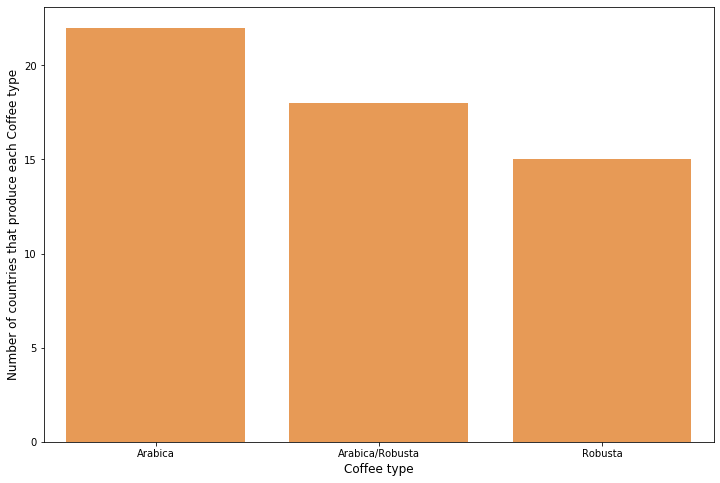

In [5]:
count = coffee_production_df.coffee_type.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, alpha=0.8, color=color[1])
plt.ylabel('Number of countries that produce each Coffee type', fontsize=12)
plt.xlabel('Coffee type', fontsize=12)
plt.show()

From the data, we see that the countrys' most dominant production come from producing Arabica coffee beans.

<font size=4>**5.1.1 Total Production and Domestic Consumption of Coffee from 1990-2020**</font>

We will construct plots to see the top producers and their domestic consumption of coffee. The term **domestic consumption**, essentially is the consumption of coffee by an exporting country (i.e. consuming their own produce).

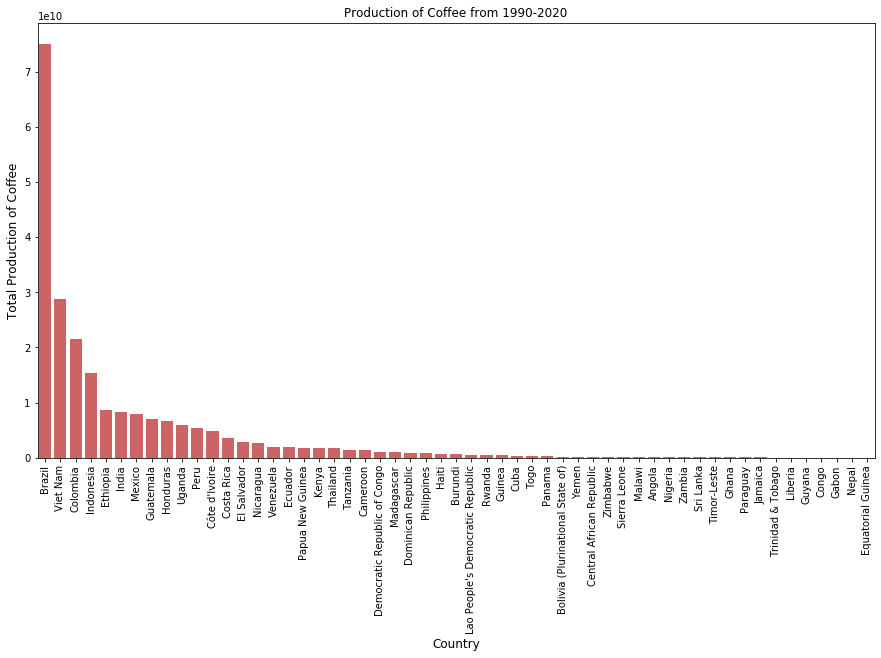

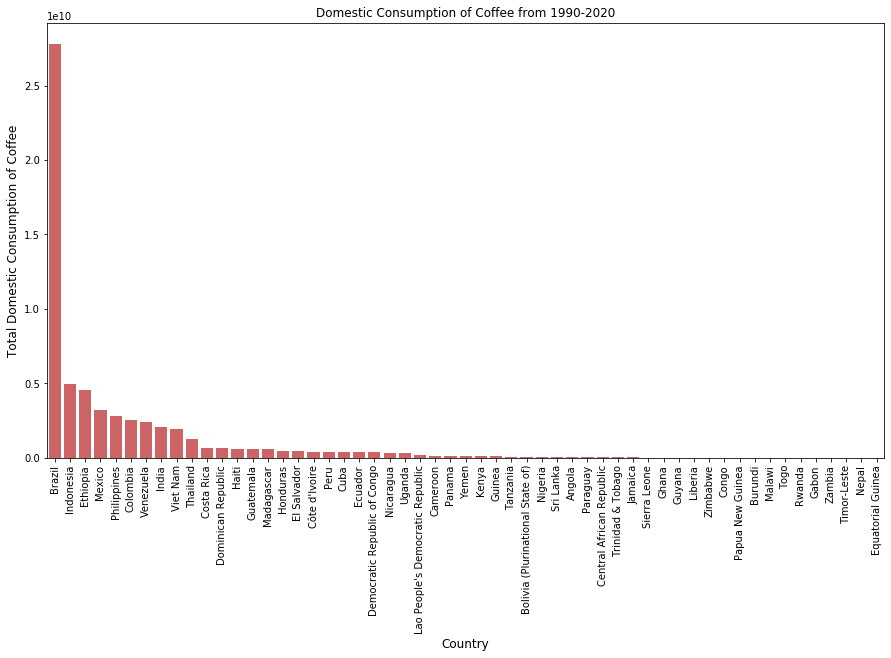

In [6]:
top_producers = coffee_production_df.sort_values(by="total_production", ascending=False)

top_domestic_consumers = coffee_domestic_consumption_df.sort_values(by="total_domestic_consumption", ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x=top_producers.country, y=top_producers.total_production, alpha=0.8, color=color[3])
plt.ylabel('Total Production of Coffee', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Production of Coffee from 1990-2020")
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(x=top_domestic_consumers.country, y=top_domestic_consumers.total_domestic_consumption, alpha=0.8, color=color[3])
plt.ylabel('Total Domestic Consumption of Coffee', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Domestic Consumption of Coffee from 1990-2020")
plt.show()

From both these plot, it is evident that **Brazil** is by far the **largest producer of coffee** around the world, as well as has the **highest domestic consumption** from all the **exporters** of coffee from around the world.

<font size=4>**5.1.2 Total Imports, Exports, and Re-exports of Coffee from 1990-2020**</font>

Now I'd like to see who are the top exporters, top importers, top re-exporters are of coffee beans around the world.

<span style="color:red">*Note: re-exports are a form of trade in which a country exports goods which it previously imported without altering them.*</span>.



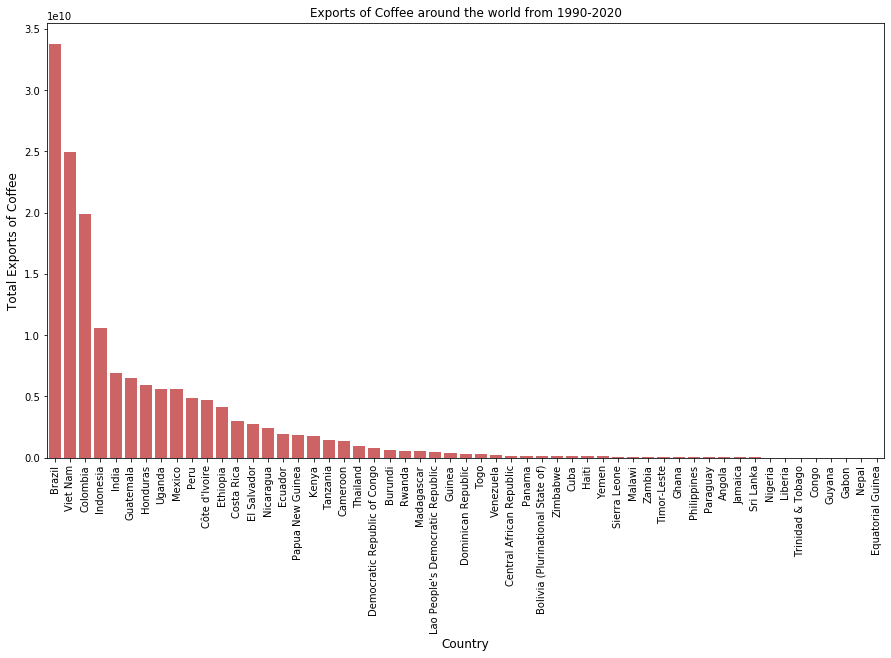

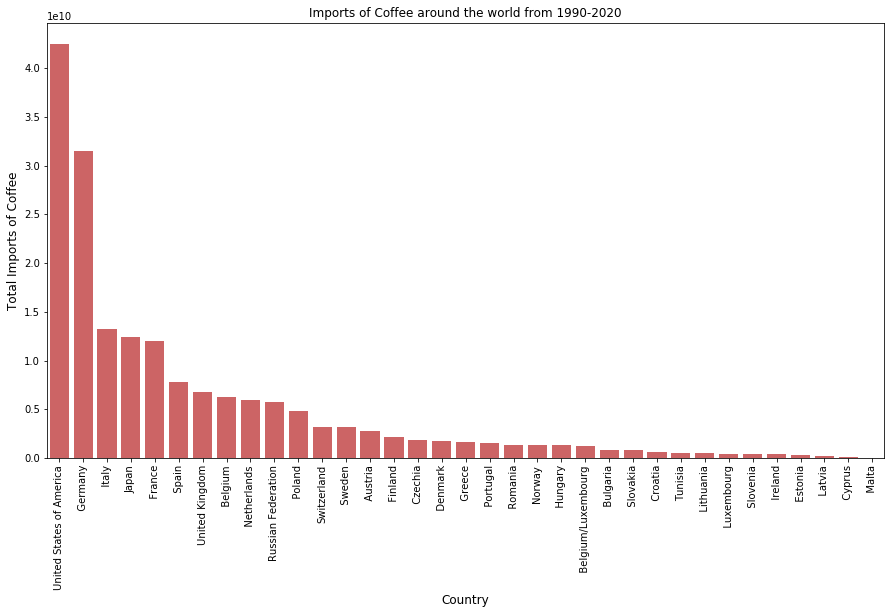

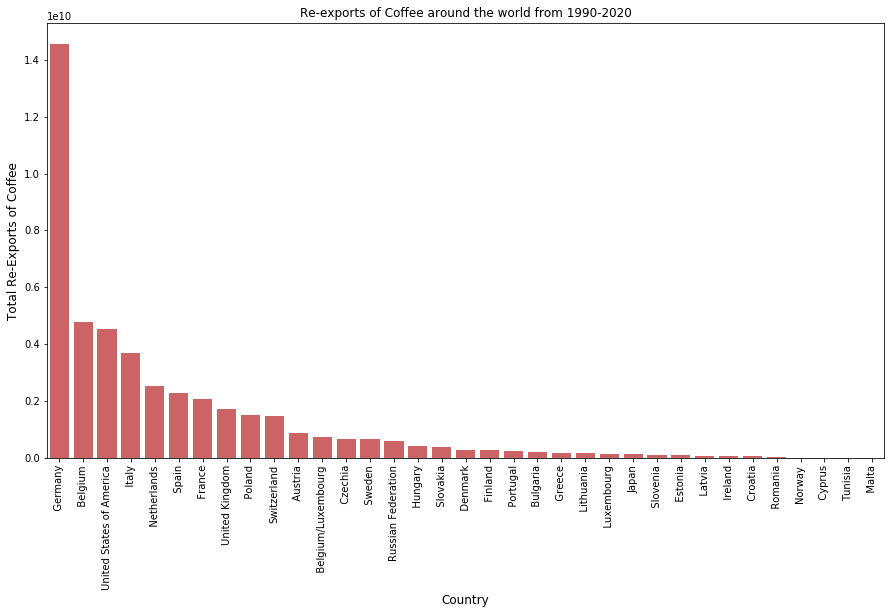

In [7]:
top_exporters = coffee_export_df.sort_values(by="total_export", ascending=False)

top_importers = coffee_import_df.sort_values(by="total_import", ascending=False)

top_re_exporters = coffee_re_export_df.sort_values(by="total_re_export", ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x=top_exporters.country, y=top_exporters.total_export, alpha=0.8, color=color[3])
plt.ylabel('Total Exports of Coffee', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Exports of Coffee around the world from 1990-2020")
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(x=top_importers.country, y=top_importers.total_import, alpha=0.8, color=color[3])
plt.ylabel('Total Imports of Coffee', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Imports of Coffee around the world from 1990-2020")
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(x=top_re_exporters.country, y=top_re_exporters.total_re_export, alpha=0.8, color=color[3])
plt.ylabel('Total Re-Exports of Coffee', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Re-exports of Coffee around the world from 1990-2020")
plt.show()

From the visualizations, the top exporters of coffee were Brazil. We notice that countries with the largest production, are also countries with the largest exports.

From the visualizations, USA have the highest amount of imports, and Germany have the highest amount of re-exports. We also find that most of the countries with the largest imports are also the countries that have the largest re-exports.

<font size=4>**5.1.3 Correlation**</font>

This begs the question, is there a correlation between *production* and *exports*; and between *imports* and *re-exports*?

<font size=3>**5.1.3.1 Correlation between *total production* and *total exports***</font>

The below code segments checks the correlation between *production* and *exports*.

<Figure size 864x576 with 0 Axes>

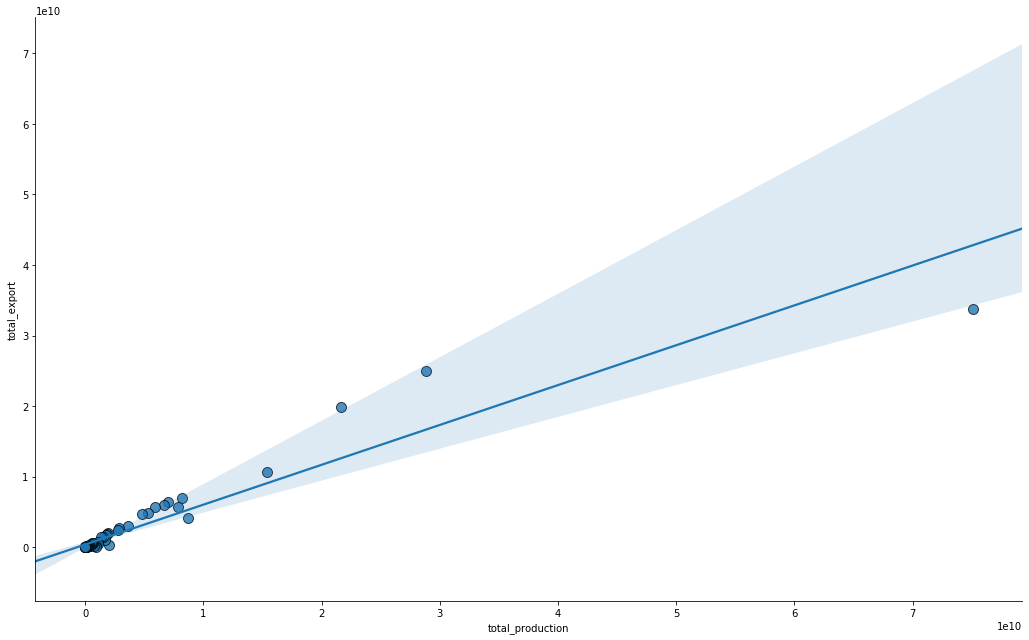

Corelation coefficient: 0.9448968652026644


In [8]:
top_prod_exp = pd.merge(top_producers, top_exporters, on='country')[['country', 'total_production', 'total_export']]

plt.figure(figsize=(12,8))
gridobj = sns.lmplot(x="total_production", y="total_export", data=top_prod_exp,
                     height=9, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=100, linewidths=.9, edgecolors='black'))
plt.show()

print("Corelation coefficient: " + str(top_prod_exp['total_production'].corr(top_prod_exp['total_export'])))

<font size=3>**5.1.3.2 Correlation between *total imports* and *total re-exports***</font>

The below code segments checks the correlation between *imports* and *re-exports*.

<Figure size 864x576 with 0 Axes>

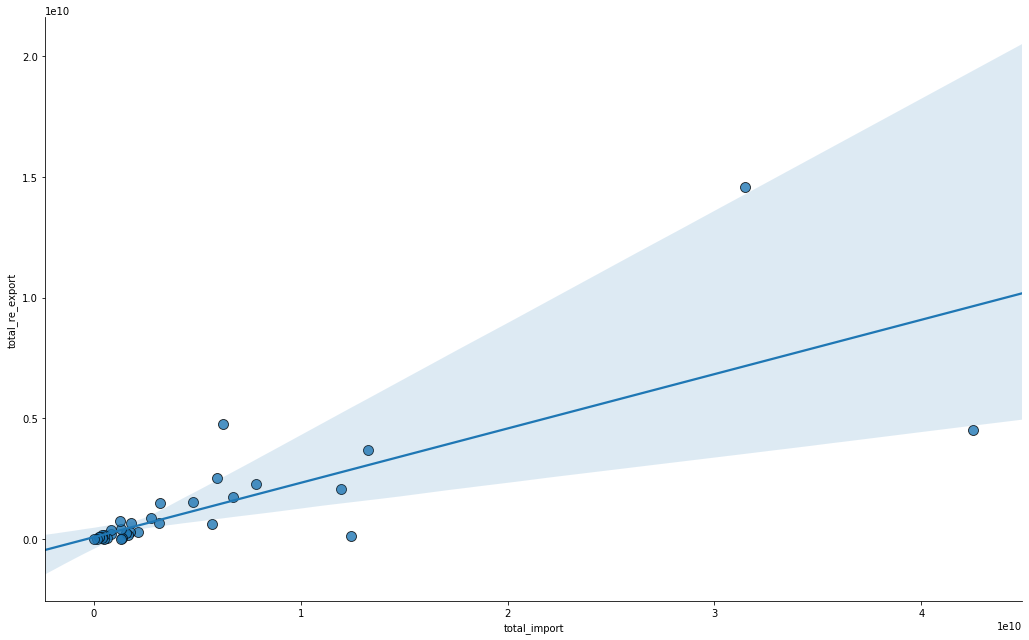

Corelation coefficient: 0.7497685216211234


In [9]:
top_imp_reexp = pd.merge(top_importers, top_re_exporters, on='country')[['country', 'total_import', 'total_re_export']]

plt.figure(figsize=(12,8))
gridobj = sns.lmplot(x="total_import", y="total_re_export", data=top_imp_reexp,
                     height=9, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=100, linewidths=.9, edgecolors='black'))
plt.show()

print("Corelation coefficient: " + str(top_imp_reexp['total_import'].corr(top_imp_reexp['total_re_export'])))

From both these graphs, it is evident there is a very strong correlation between production and exports; and a strong correlation between imports and re-exports.

<font size=4>**5.1.4 Line Plots**</font>

Now we will construct line plots to see trends of exports, imports, production, and domestic consumption of coffee over the years (i.e. from 1990-2020)

In [10]:
def transpose(df, sort_value, additional_cols=None):
    df2 = df.sort_values(by=[sort_value], ascending=False).head(10)
    t_df = df2.T
    t_df.drop(['country', sort_value], inplace=True, axis=0)
    if not additional_cols is None:
         t_df.drop([additional_cols], inplace=True, axis=0)
    t_df.columns = df2['country'].values
    t_df.head(2)
    return t_df

In [11]:
export_df = transpose(coffee_export_df, 'total_export')
import_df = transpose(coffee_import_df, 'total_import')
domestic_consumption_df = transpose(coffee_domestic_consumption_df, 'total_domestic_consumption', 'coffee_type')
producers_df = transpose(coffee_production_df, 'total_production', 'coffee_type')

In [12]:
def visulization(df, title):
    fig = px.line(df, x=df.index, y=df.columns.values, title=title)
    fig.show()

In [13]:
visulization(export_df, 'Top Countries by export')
visulization(import_df, 'Top Countries by import')
visulization(domestic_consumption_df, 'Top Countries by domestic consumption')
visulization(producers_df, 'Top Producers of coffee')